<a href="https://colab.research.google.com/github/astridgutierrez/Machine-Learning-Project/blob/main/ProjectSix_Astrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Song Popularity Using Regression Algorithms

## Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "final_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get data

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('tracks').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
import pandas as pd
data = pd.DataFrame.from_records(rows)

new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header

data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,0usLN2VpccZQwWkGLm3Odm,2013 Will Be My Year,0,161045,0,['Jay and Others :>'],['3pwVqfe1xCnGTTnbVjYf74'],4/16/2021,0.347,0.965,10,-6.014,1,0.142,0.0504,0,0.343,0.392,90.987,4
2,1Nlstdx5q4GVUyaQqHYvqh,Inner City Life - 2020 Remaster,0,422183,0,['Goldie'],['2SYqJ3uDLLXZNyZdLKBy4M'],4/16/2021,0.384,0.889,7,-6.548,1,0.0936,0.00226,0.425,0.0728,0.112,154.886,4
3,4BvreMl8IerW37NLYtBZ9e,Blow Your Mind (Mwah),0,178583,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],4/16/2021,0.677,0.796,2,-4.761,0,0.117,0.0188,0,0.0948,0.494,108.851,4
4,4K9PNGfQMYnMsY9zEDKDLC,Break My Heart,0,352453,0,"['Dua Lipa', 'Moodymann']","['6M2wZ9GZgrQXHCFfjv46we', '6pohviZSNRueSX7uNu...",4/16/2021,0.772,0.637,4,-7.846,0,0.0494,0.022,0.0353,0.0898,0.409,113.022,4
5,5xZAMT6xqi8sXUHcccwzK2,Love Again,0,258004,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],4/16/2021,0.659,0.667,11,-4.668,0,0.0339,0.00173,2.85E-05,0.1,0.468,115.982,4


## Clean data

In [ ]:
data.info()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63760 entries, 1 to 63760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                63760 non-null  object
 1   name              63760 non-null  object
 2   popularity        63760 non-null  object
 3   duration_ms       63760 non-null  object
 4   explicit          63760 non-null  object
 5   artists           63760 non-null  object
 6   id_artists        63760 non-null  object
 7   release_date      63760 non-null  object
 8   danceability      63760 non-null  object
 9   energy            63760 non-null  object
 10  key               63760 non-null  object
 11  loudness          63760 non-null  object
 12  mode              63760 non-null  object
 13  speechiness       63760 non-null  object
 14  acousticness      63760 non-null  object
 15  instrumentalness  63760 non-null  object
 16  liveness          63760 non-null  object
 17  valence     

In [ ]:
data['speechiness']=pd.to_numeric(data['speechiness'])
data['acousticness']=pd.to_numeric(data['acousticness'])
data['instrumentalness']=pd.to_numeric(data['instrumentalness'])
data['danceability']=pd.to_numeric(data['instrumentalness'])
data['energy']=pd.to_numeric(data['instrumentalness'])
data['liveness']=pd.to_numeric(data['liveness'])
data['valence']=pd.to_numeric(data['valence'])
data['tempo']=pd.to_numeric(data['tempo'])
data['popularity']=pd.to_numeric(data['popularity'])
data['explicit']=pd.to_numeric(data['explicit'])
data['key']=pd.to_numeric(data['key'])
data['mode']=pd.to_numeric(data['mode'])
data['loudness']=pd.to_numeric(data['loudness'])
data['time_signature']=pd.to_numeric(data['time_signature'])
data['duration_ms']=pd.to_numeric(data['duration_ms'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63760 entries, 1 to 63760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                63760 non-null  object 
 1   name              63760 non-null  object 
 2   popularity        63760 non-null  int64  
 3   duration_ms       63760 non-null  int64  
 4   explicit          63760 non-null  int64  
 5   artists           63760 non-null  object 
 6   id_artists        63760 non-null  object 
 7   release_date      63760 non-null  object 
 8   danceability      63760 non-null  float64
 9   energy            63760 non-null  float64
 10  key               63760 non-null  int64  
 11  loudness          63760 non-null  float64
 12  mode              63760 non-null  int64  
 13  speechiness       63760 non-null  float64
 14  acousticness      63760 non-null  float64
 15  instrumentalness  63760 non-null  float64
 16  liveness          63760 non-null  float6

### Remove non-numerical columns

In [ ]:
df = data

df_quantitative = df
cols_to_drop = []
for column in df:
    if df[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = df.drop(columns=cols_to_drop)

print(f"Working dataset shape: {df_quantitative.shape}")

Working dataset shape: (63760, 15)


## Explore data

### Feature correlation matrix

<Figure size 432x288 with 0 Axes>

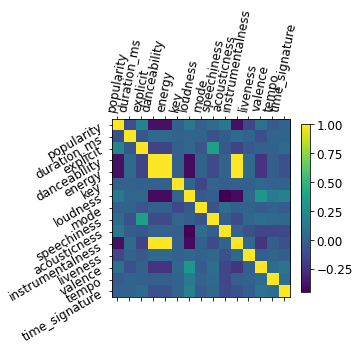

In [ ]:
if not os.path.exists('figs'):
    os.makedirs('figs')

plt.figure(1)
pd.set_option("display.max_rows", 25, "display.max_columns", None)

plt.matshow(data.corr())

labs = df_quantitative.columns
plt.xticks(range(0, 15), labs, rotation=79) 
plt.yticks(range(0, 15), labs, rotation=30)
plt.colorbar(shrink=0.75)

fname = os.path.join(".", "figs", "correlation_matrix_graph.png")
plt.savefig(fname)

### Feature Correlation Bar Plot

0
explicit            0.195994
acousticness        0.128349
loudness            0.127583
valence             0.085223
speechiness         0.063247
time_signature      0.008059
mode               -0.006425
key                -0.007904
tempo              -0.027810
duration_ms        -0.097935
liveness           -0.143241
danceability       -0.383765
energy             -0.383765
instrumentalness   -0.383765
Name: popularity, dtype: float64


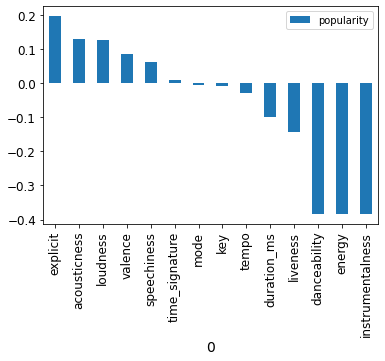

In [ ]:
correlations = data.copy().corr()['popularity']
correlations = correlations.sort_values(ascending=False).drop('popularity',axis=0)
print(correlations)
correlations.to_frame().plot.bar();

### Normalization of data

In [ ]:
norm_data = (df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())


### Split data into train, test and validation sets

In [ ]:
np.random.seed(1)

df_train_full = norm_data.sample(frac=0.8,random_state=1) #random state is a seed value
df_test = norm_data.drop(df_train_full.index)

df_validation = df_train_full.sample(frac=0.2,random_state=2) # create a validation set from training set
df_train = df_train_full.drop(df_validation.index)

In [ ]:
import numpy as np

X_train = df_train.drop(columns=['popularity'])
y_train = df_train[['popularity']].values.ravel()

X_val = df_validation.drop(columns=['popularity'])
y_val = df_validation[['popularity']].values.ravel()

X_test = df_test.drop(columns=['popularity'])
y_test = df_test[['popularity']].values.ravel()

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((40806, 14), (10202, 14), (12752, 14))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((40806,), (10202,), (12752,))

### Function to calculate prediction error

In [ ]:
def calculate_error(Y_pred, Y_actual):
    error = 0
    for i in range(len(Y_pred)):
        error += abs(Y_pred[i] - Y_actual[i])**2
    return error / len(Y_pred)

# K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor #like KNN, but for continuous data
from sklearn import preprocessing

k_errors = [np.inf] # k=0 should have infinite error
for k in range(1,25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train) 
    Y_val_pred = model.predict(X_val)
    k_errors.append(calculate_error(Y_val_pred, y_val))

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X_train, y_train, cv=3)


In [ ]:
cv_results

{'fit_time': array([0.105093  , 0.08226275, 0.17801023]),
 'score_time': array([4.97116137, 3.84001565, 2.06427979]),
 'test_score': array([0.22423437, 0.232453  , 0.23025448])}

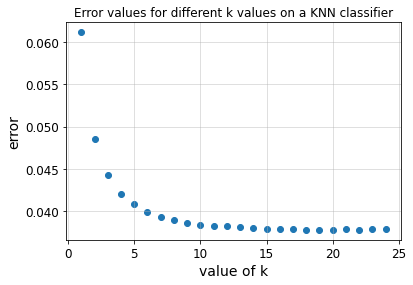

In [ ]:

if not os.path.exists('figs'):
    os.makedirs('figs')

plt.scatter(x=range(len(k_errors)), 
            y=k_errors)
plt.xlabel('value of k')
plt.ylabel('error')
plt.title('Error values for different k values on a KNN classifier')
plt.grid(axis='both',alpha=0.5)

fname = os.path.join(".", "figs", "k_values.png")
plt.savefig(fname)


In [ ]:
k=7
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train) 
Y_pred = model.predict(X_test)
k_error_final = calculate_error(Y_pred, y_test)
print(f"testing error is {k_error_final}\n\n")

testing error is 0.038974600222772764




In [ ]:
print(cross_validate(model, X_train, y_train, cv=3))

{'fit_time': array([0.06630707, 0.05726123, 0.05536652]), 'score_time': array([1.7193954 , 1.73100972, 1.66730499]), 'test_score': array([0.20108141, 0.21503333, 0.20062183])}


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = 10)
print(accuracy)

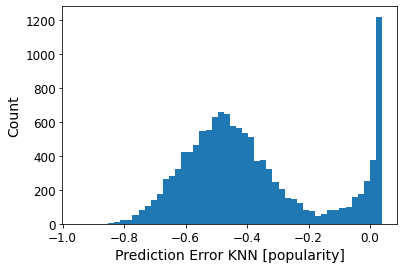

In [ ]:
test_labels = y_test

error = k_error_final - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error KNN [popularity]")
_ = plt.ylabel("Count")

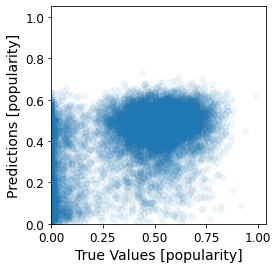

In [ ]:
plt.scatter(y_test, Y_pred, alpha=0.05)
plt.xlabel('True Values [popularity]')
plt.ylabel('Predictions [popularity]')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot()

In [ ]:
y_test[10:]

array([0.  , 0.  , 0.  , ..., 0.39, 0.4 , 0.54])

In [ ]:
Y_pred[10:]

array([0.42571429, 0.42571429, 0.45857143, ..., 0.50142857, 0.48571429,
       0.46285714])

# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
Y_val_pred_svr = svr_model.predict(X_val)
svr_error = calculate_error(Y_val_pred_svr, y_val)

In [ ]:
print(svr_error)

0.03639659037734575


In [ ]:
print(cross_validate(svr_model, X_train, y_train, cv=3))

{'fit_time': array([24.08158088, 21.61488724, 22.96676278]), 'score_time': array([7.58041525, 7.71624923, 7.80913711]), 'test_score': array([0.2563152 , 0.27636158, 0.26131039])}


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(svr_model, X_test, y_test, scoring='accuracy', cv = 10)
print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _chec

[nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _chec

In [ ]:
test_labels = y_test

error = Y_val_pred_svr - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error SVR[popularity]")
_ = plt.ylabel("Count")

ValueError: ignored

In [ ]:
plt.scatter(y_test, Y_val_pred_svr, alpha=0.1)
plt.xlabel('True Values [popularity]')
plt.ylabel('Predictions SVR [popularity]')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot()

# Stochastic Gradient Descent Regression

In [ ]:
# from sklearn.linear_model import SGDRegressor
# from sklearn.model_selection import GridSearchCV

# sgdr_model = SGDRegressor()
# param_grid = {
#     'alpha': 10.0 ** -np.arange(1, 7),
#     'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'learning_rate': ['constant', 'optimal', 'invscaling'],
# }
# sgdr_clf = GridSearchCV(sgdr_model, param_grid)
# sgdr_clf.fit(X_train, y_train)


In [ ]:
# print("Best parameters:" + str(sgdr_clf.best_params_))
# print("Best score: " + str(sgdr_clf.best_score_))

In [ ]:
# sgdr_model_2 = make_pipeline(StandardScaler(), SGDRegressor(alpha=1e-05, learning_rate='invscaling', loss='squared_loss', penalty='l1'))
# sgdr_model_2.fit(X_train, y_train)

# y_val_pred_sgdr2 = sgdr_model_2.predict(X_test)
# sgdr_error2 = calculate_error(y_val_pred_sgdr2, y_val)
# print(sgdr_error2)

In [ ]:
# test_labels = y_test

# error = y_val_pred_sgdr2 - y_test
# plt.hist(error, bins = 50)
# plt.xlabel("Prediction Error SGDR [popularity]")
# _ = plt.ylabel("Count")

In [ ]:
# plt.scatter(y_test, y_val_pred_sgdr2, alpha=0.1)
# plt.xlabel('True Values [popularity]')
# plt.ylabel('Predictions SGDR [popularity]')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot()

In [ ]:
from sklearn.linear_model import SGDRegressor
 
sgdr_model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgdr_model.fit(X_train, y_train)

In [ ]:
y_val_pred_sgdr = sgdr_model.predict(X_test)
sgdr_error = calculate_error(y_val_pred_sgdr, y_test)
print(sgdr_error)

In [ ]:
test_labels = y_test

error = y_val_pred_sgdr - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error SGDR [popularity]")
_ = plt.ylabel("Count")

In [ ]:
plt.scatter(y_test, y_val_pred_sgdr, alpha=0.1)
plt.xlabel('True Values [popularity]')
plt.ylabel('Predictions SGDR[popularity]')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot()

In [ ]:
print(cross_validate(sgdr_model, X_train, y_train, cv=3))

In [ ]:
accuracy = cross_val_score(sgdr_model, X_test, y_test, scoring='accuracy', cv = 10)
print(accuracy)